In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
file_path = "../data/cleaned_cognitive_decline.csv"
df = pd.read_csv(file_path)

In [ ]:
# Identify categorical and numerical features
categorical_features = ["Age_Group", "Race_Ethnicity", "Location"]
numerical_features = ["Year", "Low_Confidence_Limit", "High_Confidence_Limit",
                      "Functional_Difficulties", "Needs_Assistance", "Cognitive_Decline",
                      "Consulted_Professional", "q_Interferes_Activities", "q_Needs_Assistance",
                      "q_Worsening_Decline", "q_Consulted_Professional", "Small_Sample_Size",
                      "No_Data_Available", "Regional_Issue", "Few_States_Reported"]

### One-Hot Encoding

In [6]:
# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_features]))

# Assign column names to the encoded features
X_encoded.columns = encoder.get_feature_names_out(categorical_features)

# Drop original categorical columns and merge with numerical features
X = df[numerical_features].copy()
X = pd.concat([X, X_encoded], axis=1)

print("One-Hot Encoding applied successfully!")

One-Hot Encoding applied successfully!


### Splitting the Data
- **80% Training Set**: Used to train the model
- **20% Testing Set**: Set aside before training (model will never see this data)

In [7]:
# define the target variable and features
y = df["Percentage_Value"]
X = X

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (17745, 81), Testing Set: (4437, 81)


### Feature Scaling (Standardization)

In [11]:
# initialize the scaler
scaler = StandardScaler()

# fit on training data & transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

### Train a Linear Regression Model

In [13]:
# initialize the Linear Regression model
linear_reg = LinearRegression()

# train the model using the training dataset
linear_reg.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [14]:
# make predictions on the test set
y_pred = linear_reg.predict(X_test)

### Evaluate the Linear Regression Model

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
# Print results
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 0.85
Mean Squared Error (MSE): 9.33
R² Score: 0.9479


**Interpreting Results**
1. **Mean Absolute Error (MAE) = 0.85**
   - On an average, the model's predictions are **0.85 percentage points away** from the actual cognitive decline values.

2. **Mean Squared Error (MSE) = 9.33**
    - This value represents the **average squared error** in predictions.
    - Since MSE **penalizes larger errors**, it's useful for detecting big mistakes.
    - A lower value means the model is making fewer large errors.

3. **R^2 Score = 0.9479**
    - This means that **94.79% of the variance in cognitive decline** is explained by the model.
    - **Closer to 1 is better**, so this is a **very strong** result.

### Visualizing Predictions vs. Acutal Values

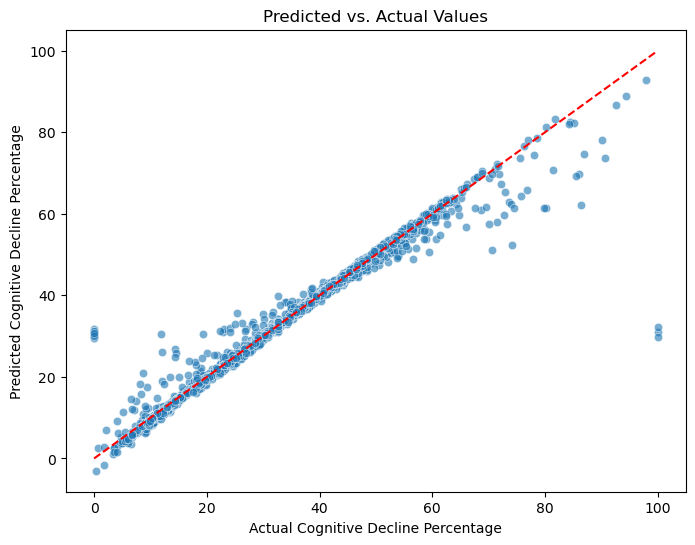

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Plot the ideal diagonal line (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='dashed')

# Labels and title
plt.xlabel("Actual Cognitive Decline Percentage")
plt.ylabel("Predicted Cognitive Decline Percentage")
plt.title("Predicted vs. Actual Values")

plt.show()

**Observations**
1. **Points close to the red dashed line**
    - The model’s predictions are **accurate** for most data points.
    - This indicates **strong performance** of the Linear Regression model.

2. **Some deviation from the line**
    - A few points **above or below the line suggest prediction errors**.
    - These are **natural errors** in regression models but could be improved with more complex models.

3. **Potential Outliers**
    - The **few points far from the line might indicate outliers or areas where the model struggles**.


### Decision Tree Regression

In [18]:
from sklearn.tree import DecisionTreeRegressor

# initialize Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)

# train the model
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Evaluating the Decision Tree Regressor

In [19]:
# make predictions on the test set
y_pred_tree = tree_reg.predict(X_test)

In [20]:
# compute evaluation metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [21]:
# Print results
print(f"Decision Tree Regressor Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"R² Score: {r2_tree:.4f}")

Decision Tree Regressor Performance Metrics:
Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 6.94
R² Score: 0.9613


**Interpretation of the Results**
1. **Lower MAE (0.22)** -> The Decision Tree makes **smaller errors on average**.
2. **Lower MSE (6.94)** -> The Decision Tree has fewer **large errors** than Linear Regression.
3. **Higher R^2 Score (0.9613)** -> The Decision Tree explains **more variance** in cognitive decline.

#### Conclusion:
The **Decision Tree is performing significantly better** than Linear Regression.